In [1]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt

from datetime   import datetime, timedelta
from matplotlib import style
style.use('fivethirtyeight')
%matplotlib inline

# Reflect Tables into SQLAlchemy ORM

In [2]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy

from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [3]:
# create engine to hawaii.sqlite

engine = create_engine('sqlite:///Resources/hawaii.sqlite')

In [4]:
# reflect an existing database into a new model

base = automap_base()
# reflect the tables
base.prepare(engine, reflect=True)

In [5]:
# View all of the classes that automap found

base.classes.keys()

['measurement', 'station']

In [6]:
# Save references to each table

measurement = base.classes.measurement
station = base.classes.station

In [7]:
# Create our session (link) from Python to the DB

session = Session(engine)

In [8]:
inspector = inspect(engine)
meas_cols = inspector.get_columns('measurement')
stat_cols = inspector.get_columns('station')

In [9]:
for i in meas_cols:
    print(i['name'], '\t\t', i['type'])

id 		 INTEGER
station 		 TEXT
date 		 TEXT
prcp 		 FLOAT
tobs 		 FLOAT


In [10]:
for i in stat_cols:
    print(i['name'], '\t\t', i['type'])

id 		 INTEGER
station 		 TEXT
name 		 TEXT
latitude 		 FLOAT
longitude 		 FLOAT
elevation 		 FLOAT


# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.

last_date = engine.execute('SELECT date FROM measurement ORDER BY date DESC').first()[0]

last_date

'2017-08-23'

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

year, month, day = map(int, last_date.split("-"))
year_ago = datetime(year, month, day) - timedelta(days=365)
print(year_ago.strftime("%Y-%m-%d"))

# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores

last_year_data = session.query(measurement.date, measurement.prcp).filter(measurement.date >= year_ago).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
date = []
precipitation = []

for i, j in last_year_data:
    date.append(i)
    precipitation.append(j)

df_precipitation = pd.DataFrame({'date': date, 'precipitaion': precipitation}).set_index('date')

# Sort the dataframe by date
df_precipitation = df_precipitation.sort_values('date')

df_precipitation.head()

2016-08-23


,precipitaion
date,
2016-08-24,0.08
2016-08-24,NaN
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,2.15


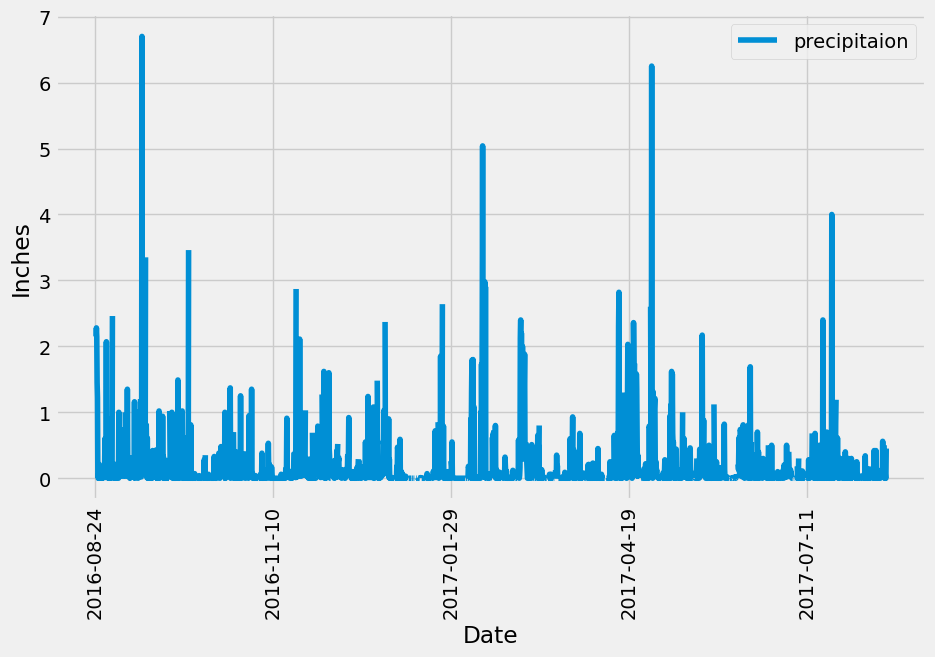

In [13]:
# Use Pandas Plotting with Matplotlib to plot the data

df_precipitation.plot(figsize=(10, 6))

plt.xlabel('Date')
plt.ylabel('Inches')
plt.xticks(rotation=90);

In [14]:
# Use Pandas to calculate the summary statistics for the precipitation data

df_precipitation.describe()

,precipitaion
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [15]:
# Design a query to calculate the total number of stations in the dataset

number_of_stations = session.query(func.count(station.name)).all()[0][0]

number_of_stations

9

In [16]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

engine.execute('SELECT station, count(station) AS count FROM measurement GROUP BY station ORDER BY count DESC').all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [17]:
# the most active stations (i.e. which stations have the most rows?)
engine.execute('SELECT station, count(station) AS count FROM measurement GROUP BY station ORDER BY count DESC').all()[0][0]

'USC00519281'

In [18]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

engine.execute('SELECT min(tobs), max(tobs), avg(tobs) FROM measurement WHERE station = "USC00519281"').all()

[(54.0, 85.0, 71.66378066378067)]

In [19]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

active_station_temperature = engine.execute('SELECT tobs FROM measurement WHERE date >= 2016-08-23 AND station = "USC00519281"').all()

active_station_temperature

[(70.0,),
 (62.0,),
 (74.0,),
 (75.0,),
 (74.0,),
 (76.0,),
 (69.0,),
 (66.0,),
 (70.0,),
 (75.0,),
 (64.0,),
 (60.0,),
 (61.0,),
 (68.0,),
 (64.0,),
 (66.0,),
 (67.0,),
 (70.0,),
 (67.0,),
 (67.0,),
 (69.0,),
 (60.0,),
 (75.0,),
 (75.0,),
 (65.0,),
 (75.0,),
 (69.0,),
 (67.0,),
 (66.0,),
 (69.0,),
 (72.0,),
 (67.0,),
 (65.0,),
 (64.0,),
 (67.0,),
 (67.0,),
 (68.0,),
 (69.0,),
 (66.0,),
 (69.0,),
 (61.0,),
 (71.0,),
 (70.0,),
 (70.0,),
 (66.0,),
 (71.0,),
 (61.0,),
 (68.0,),
 (67.0,),
 (62.0,),
 (65.0,),
 (69.0,),
 (63.0,),
 (62.0,),
 (61.0,),
 (64.0,),
 (72.0,),
 (68.0,),
 (68.0,),
 (68.0,),
 (71.0,),
 (69.0,),
 (65.0,),
 (67.0,),
 (71.0,),
 (70.0,),
 (69.0,),
 (69.0,),
 (70.0,),
 (69.0,),
 (70.0,),
 (73.0,),
 (74.0,),
 (67.0,),
 (68.0,),
 (64.0,),
 (65.0,),
 (68.0,),
 (68.0,),
 (72.0,),
 (67.0,),
 (64.0,),
 (71.0,),
 (70.0,),
 (72.0,),
 (73.0,),
 (74.0,),
 (69.0,),
 (71.0,),
 (72.0,),
 (71.0,),
 (74.0,),
 (73.0,),
 (71.0,),
 (71.0,),
 (69.0,),
 (69.0,),
 (72.0,),
 (68.0,),
 (75.0,),


In [20]:
tobs = []

for i in active_station_temperature:
    tobs.append(i[0])
    
df_active_station_temperature = pd.DataFrame({'tobs': tobs})

df_active_station_temperature

,tobs
0,70.0
1,62.0
2,74.0
3,75.0
4,74.0
...,...
2767,77.0
2768,77.0
2769,76.0
2770,76.0


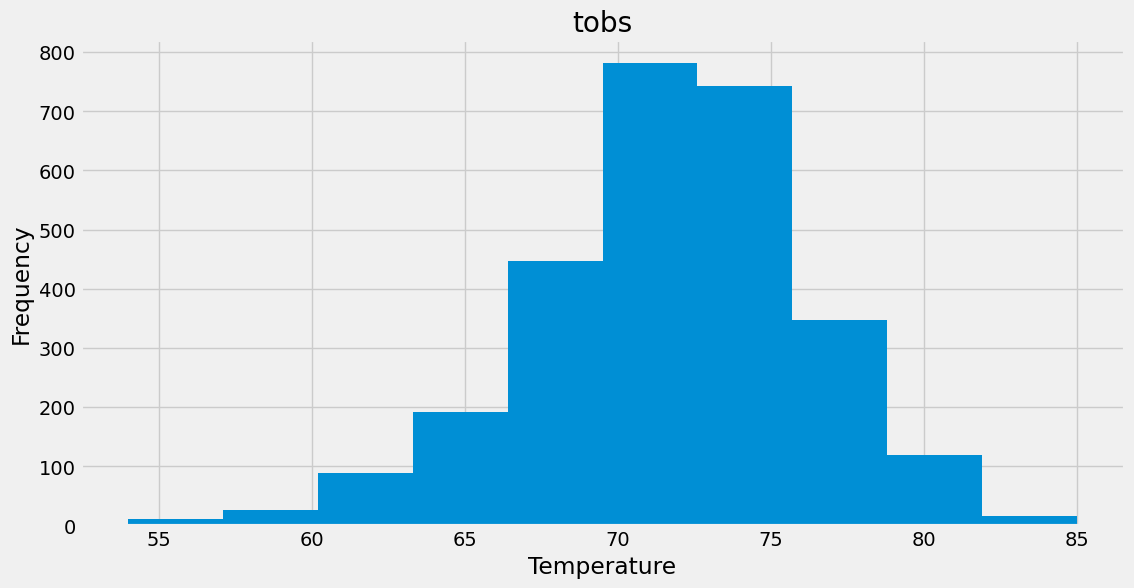

In [21]:
df_active_station_temperature.hist(bins=10, figsize=(12, 6))

plt.ylabel('Frequency')
plt.xlabel('Temperature')

plt.show()

# Close Session

In [22]:
# Close Session
session.close()